<a href="https://colab.research.google.com/github/DKowarsch/Business-Analytics/blob/MGMT566/Copy_Final_Project_using_Logistics_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
#from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('ggplot')


In [ ]:
# Deal with data
tp = {'French' : 0, 'Thai': 1, 'Italian' : 2, 'Burger': 3}
price = {'$': 0, '$$': 1, '$$$': 2}
est = {'0-10' : 0, '10-30': 1, '30-60' : 2, '>60': 3}
pat = {'None' : 0, 'Some' : 1, 'Full':2}

x = np.array([
# 0     1      2     3       4            5             6      7      8              9
# Alt   Bar    Fri    Hun    Pat          Price         Rain   Res    Type           Est
[True,  False, False, True,  pat['Some'], price['$$$'], False, True,  tp['French'],  est['0-10']], # true
[True,  False, False, True,  pat['Full'], price['$'],   False, False, tp['Thai'],    est['30-60']], # false
[False, True,  False, False, pat['Some'], price['$'],   False, False, tp['Burger'],  est['0-10']], # true
[True,  False, True,  True,  pat['Full'], price['$'],   True,  False, tp['Thai'],    est['10-30']], # true
[True,  False, True,  False, pat['Full'], price['$$$'], False, True,  tp['French'],  est['>60']], # false
[False, True,  False, True,  pat['Some'], price['$$'],  True,  True,  tp['Italian'], est['0-10']], # true
[False, True,  False, False, pat['None'], price['$'],   True,  False, tp['Thai'],    est['10-30']], # false
[False, False, False, True,  pat['Some'], price['$$'],  True,  True,  tp['Thai'],    est['0-10']], # true
[False, True,  True,  False, pat['Full'], price['$'],   True,  False, tp['Burger'],  est['>60']], # false
[True,  True,  True,  True,  pat['Full'], price['$$$'], False, True,  tp['Italian'], est['10-30']], # false
[False, False, False, False, pat['None'], price['$'],   False, False, tp['Thai'],    est['0-10']], #false
[True,  True,  True,  True,  pat['Full'], price['$'],   False, False, tp['Burger'],  est['30-60']], # true
])

y = np.array([True, False, True, True, False, True, False, True, False, False, False, True])

#print the array
print(x)
#convert it to pandas' data frame

df_x = pd.DataFrame(x, columns = ['Alterative','Bar','Friday','Hungry','Pat',
                                  'Price','Rain','Reservation','Type','EstimatedWaitTime'])
df_y = pd.DataFrame(y, columns = ['Wait_or_Not'])
df_1 = pd.concat([df_x, df_y], axis = 1)
df_1




[[1 0 0 1 1 2 0 1 0 0]
 [1 0 0 1 2 0 0 0 1 2]
 [0 1 0 0 1 0 0 0 3 0]
 [1 0 1 1 2 0 1 0 1 1]
 [1 0 1 0 2 2 0 1 0 3]
 [0 1 0 1 1 1 1 1 2 0]
 [0 1 0 0 0 0 1 0 1 1]
 [0 0 0 1 1 1 1 1 1 0]
 [0 1 1 0 2 0 1 0 3 3]
 [1 1 1 1 2 2 0 1 2 1]
 [0 0 0 0 0 0 0 0 1 0]
 [1 1 1 1 2 0 0 0 3 2]]


,Alterative,Bar,Friday,Hungry,Pat,Price,Rain,Reservation,Type,EstimatedWaitTime,Wait_or_Not
0,1,0,0,1,1,2,0,1,0,0,True
1,1,0,0,1,2,0,0,0,1,2,False
2,0,1,0,0,1,0,0,0,3,0,True
3,1,0,1,1,2,0,1,0,1,1,True
4,1,0,1,0,2,2,0,1,0,3,False
5,0,1,0,1,1,1,1,1,2,0,True
6,0,1,0,0,0,0,1,0,1,1,False
7,0,0,0,1,1,1,1,1,1,0,True
8,0,1,1,0,2,0,1,0,3,3,False
9,1,1,1,1,2,2,0,1,2,1,False


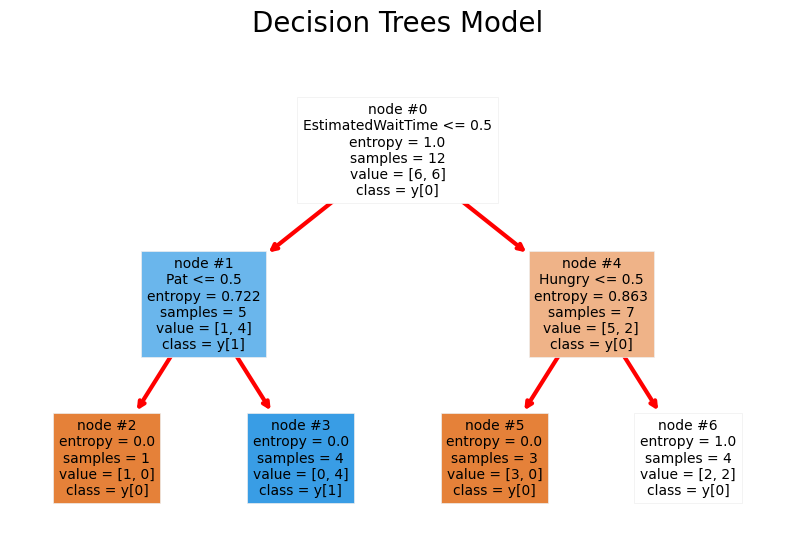

In [ ]:
# Build a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(random_state=12, criterion='entropy', max_depth=2)
clf = clf.fit(df_x, df_y)

# Define target variable class names for the legend
class_names = df_y[df_y.columns[0]].unique()

# Visualize the tree model
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the tree with feature names, filled boxes, and class names
out = tree.plot_tree(clf, filled=True, fontsize=10, feature_names=df_x.columns, class_names= True,node_ids = True)

# Modify arrow properties and add condition labels
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

# Add legend for class names
plt.title('Decision Trees Model', fontsize = 20, loc ='center', pad = 30)

plt.show()

**Observations:**

- The estimated wait time is the first node in the decision tree which implies that it provides the highest information gain while deciding whether a person would wait or not.
- The first node splits the data at 0.5 which means that in a majority of scenarios, the waiting time of more than 10 minutes is a significant factor in deciding whether the customer would wait or not.
- A customer would not even wait for 10 minutes if the restaurant has no customers which makes sense. If there are some people in the restaurant then the customer would wait.
- If a customer has to wait more than 10 minutes, then it depends on whether the customer is hungry or not. If a customer is not hungry, then he/she would not wait.
- If a customer has to wait longer than 10 and is hungry, then the customer would most likely wait if the restaurant serves burgers (assuming cuisine specific restaurants do not serve burgers).

In [ ]:
-5/7 *np.log2(5/7) -2/7*(np.log2(2/7))

0.863120568566631

In [ ]:
-2/5*np.log2(2/5)-3/5*np.log2(3/5)

0.9709505944546686

In [ ]:
-1/5 *np.log2(1/5) -4/5*(np.log2(4/5))

0.7219280948873623

In [ ]:
0.8631*(7/12) +0.7219*(5/12)


0.8042666666666667

### How to import a csv to colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INNHotelsGroup_bookingCancellationPred.csv to INNHotelsGroup_bookingCancellationPred.csv


In [ ]:
#read file by the file's name
df = pd.read_csv("INNHotelsGroup_bookingCancellationPred.csv")

### Display the top 10 record of the dataset

In [ ]:
df.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### Print a Descriptive Table

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Interesting in data type and dataset dimentions

In [ ]:
## data dimentions
shape = df.shape
print(f'dataset dim is {shape}')
# print an empty line
print()
# data types using dtypes
df.dtypes

dataset dim is (36275, 19)



Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
#select the numerical attributes

attributes = ['lead_time','repeated_guest','avg_price_per_room','no_of_children','no_of_weekend_nights','no_of_previous_bookings_not_canceled']

In [ ]:
df['booking_status'] = df['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})


In [ ]:
### EDA

In [ ]:
# check column names
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: >

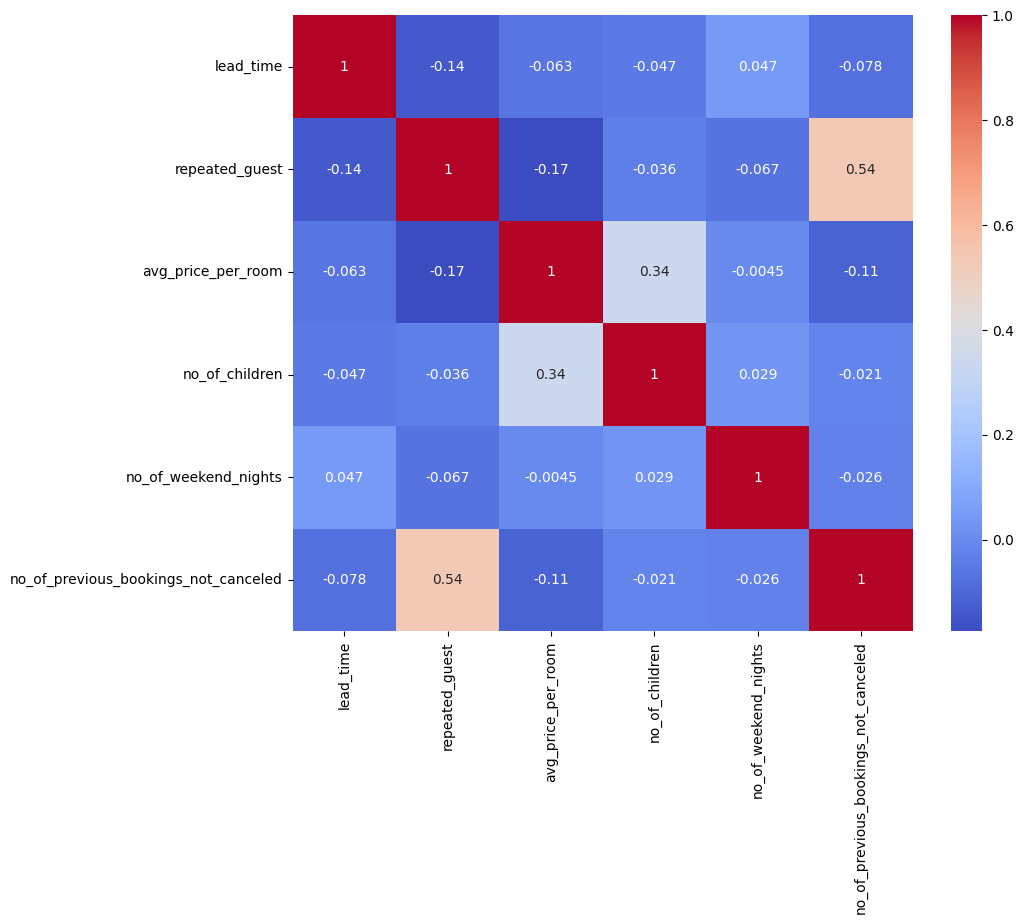

In [ ]:
#heat map
plt.figure(figsize=(10,8))
c= df[attributes].corr()
sns.heatmap(c,cmap='coolwarm',annot=True)


In [ ]:
from sklearn import linear_model

In [ ]:
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
X= df[attributes]
y=df['booking_status']
logr = linear_model.LogisticRegression()
logr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Intercept:", logr.intercept_)
print("Coefficients:", logr.coef_)
print("Classes:", logr.classes_)
print("Number of iterations:", logr.n_iter_)


Intercept: [-3.4312267]
Coefficients: [[ 0.01237754 -0.28003816  0.01409628 -0.18425837  0.11965824 -0.65486711]]
Classes: [0 1]
Number of iterations: [100]


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have a separate test dataset X_test and y_test
# Make predictions on the test data
y_pred = logr.predict(X)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[21989  2401]
 [ 6408  5477]]


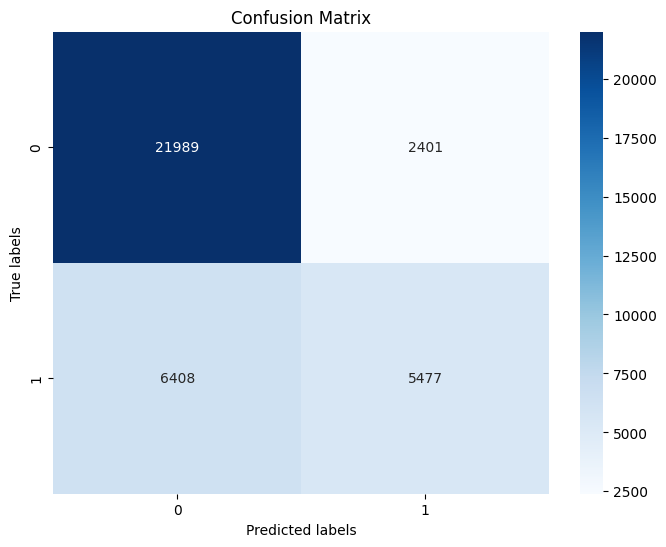

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have made predictions y_pred
# Compute classification report
report = classification_report(y, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     24390
           1       0.70      0.46      0.55     11885

    accuracy                           0.76     36275
   macro avg       0.73      0.68      0.69     36275
weighted avg       0.75      0.76      0.74     36275

